In [4]:
%matplotlib inline
import import_ipynb
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from SV_channel import SV_channel
from HybridMassiveMIMO import HybridMassiveMIMO

In [2]:
np.random.seed(79)

qam16_gray = {"0000": np.complex128(-3 + 3j), "0001": np.complex128(-3 + 1j), "0010": np.complex128(-3 - 3j), \
              "0011": np.complex128(-3 - 1j), "0100": np.complex128(-1 + 3j), "0101": np.complex128(-1 + 1j), \
              "0110": np.complex128(-1 - 3j), "0111": np.complex128(-1 - 1j), "1000": np.complex128(3 + 3j), \
              "1001": np.complex128(3 + 1j), "1010": np.complex128(3 - 3j), "1011": np.complex128(3 - 1j), \
              "1100": np.complex128(1 + 3j), "1101": np.complex128(1 + 1j), "1110": np.complex128(1 - 3j), \
              "1111": np.complex128(1 - 1j)}

N_tx = (4, 4)
N_rx = (2, 2)
N_rf = 4
model = HybridMassiveMIMO(N_s = 4,
                     N_rf = N_rf, 
                     N_tx = N_tx[0] * N_tx[1], 
                     N_rx = N_rx[0] * N_rx[1],
                     N_ofdm = 10,
                     N_ifft = 512,
                     N_c = 450,
                     N_gi = 64,
                     mapping = qam16_gray)

SNR_dBHz = (40, 70)
F_rf = np.random.normal(0, 1, size = (N_tx[0] * N_tx[1], N_rf)) + 1j * np.random.normal(0, 1, size = (N_tx[0] * N_tx[1], N_rf))

sv_channel = SV_channel(cl = 10, 
                    rays = 2, 
                    d_phi = 7.5, 
                    d_thetta = 7.5,
                    a_r = N_rx,
                    a_t = N_tx)

H = sv_channel.compute_channel()

ber = model.compute_BER(F_rf, H, SNR_dBHz)

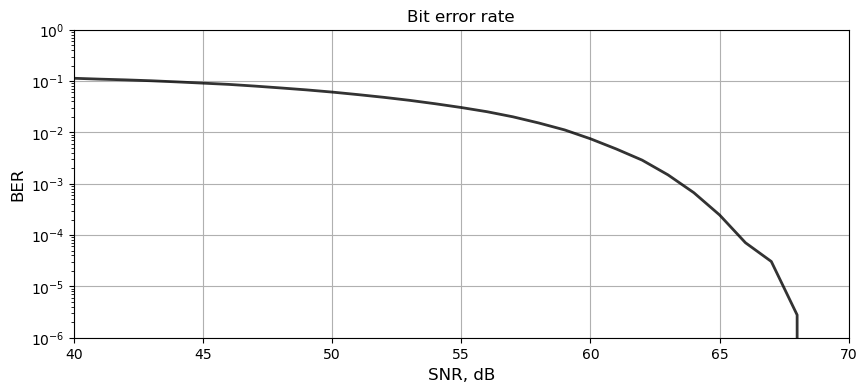

In [3]:
figsize(10, 4)
plt.semilogy(np.arange(40, 70), ber, color = 'k', alpha = 0.8, lw = 2.0)
plt.xlim(40, 70)
plt.ylim(1e-6, 1)
plt.xlabel('SNR, dB', fontsize = 12)
plt.ylabel('BER', fontsize = 12)
plt.title('Bit error rate', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid()
plt.show()